In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
def sigmoid(z):
  A = 1/(1+np.exp(-z))
  return (A)

In [ ]:
def GetIntialWeights(layers):
  np.random.seed(50)
  weights = {}
  for weightNode in range(1, len(layers)):
    weights['W'+str(weightNode)] = np.random.randn(layers[weightNode], layers[weightNode-1])
    weights['W'+str(weightNode)][:, 0:1] = 0
  return (weights)


In [ ]:
def ForwardNetwork(weight, x):
  vault = []
  Z = np.dot(weight, x)
  A = sigmoid(Z)
  elements = [weight,x,Z,A]
  vault.append(elements) 
  return (A,vault)

In [ ]:
def ForwardCall(x, layers, weight):
  a = x
  W = weight
  fc_vault = {}
  for layer in range(1, len(layers)):
    A, vault = ForwardNetwork(W['W'+str(layer)],a)
    a = A
    fc_vault['FC'+str(layer)] = np.asarray(vault)
  return (A, fc_vault)


In [ ]:
def Get_dLdA(fc_vault, total_layers, Y):

  dA  = {}
  L = total_layers
  A = fc_vault['FC'+str(L-1)][0][3]
  DA_L =  - (np.divide(Y, A) - np.divide(1 - Y, 1 - A))
  dA['dA'+str(L-1)] = DA_L

  for layers in reversed(range(1, L-1)):

    # FROM CHAIN RULE FOR DL/DA
    old_dA = dA['dA'+str(layers+1)]
    A = fc_vault['FC'+str(layers+1)][0][3]
    dAdZ = A * (1 - A)
    w = fc_vault['FC'+str(layers+1)][0][0]

    #CALCULATING DA
    DA_L = np.multiply(old_dA, dAdZ)
    DA_L = np.dot(w.T, DA_L)
    dA['dA'+str(layers)] = DA_L

  return (dA)

In [ ]:
def Get_dLdZ(dA, fc_vault, total_layers):

  dZ = {}
  L = total_layers
  for layers in range(1, L):

###CALCULATING DL/DZ FROM CHAIN RULE

    DA_L = dA['dA'+str(layers)]
    A = fc_vault['FC'+str(layers)][0][3]
    dAdZ = A * (1- A)
    dLdZ = np.multiply(DA_L, dAdZ)

    dZ['dZ'+str(layers)] = dLdZ

  return (dZ)

In [ ]:
def Get_UpdatedWeights(dZ, fc_vault, total_layers, lr):

  W = {}
  L = total_layers
  ##INPUT LAYER TO LAYER 1...

  dLdZ = dZ['dZ1']
  A = fc_vault['FC1'][0][1]    # PREVIOUS A value
  dLdW = np.dot(dLdZ, A.T)
  w = fc_vault['FC1'][0][0]
  W['W1'] =  w - (lr*dLdW)
  
  ## REST CONNECTED LAYERS...

  for layers in range(2, L):

    dLdZ = dZ['dZ'+str(layers)]
    A = fc_vault['FC'+str(layers-1)][0][3]    # PREVIOUS A value
    dLdW = np.dot(dLdZ, A.T)
    w = fc_vault['FC'+str(layers)][0][0]
  
    W['W'+str(layers)] =  w - (lr*dLdW)

  return (W)

In [ ]:
def MultiLayerPerceptron(layers, X, Y, lr, simulation):
  w = []
  costs = []
  m = X.shape[0]
  W = GetIntialWeights(layers)
  
  for iter in range(simulation):

    L =  len(layers)

    w.append(W)

    A, fc = ForwardCall(x, layers, W)

    loss = np.dot(Y.T, np.log(A)) + np.dot((1-Y.T),np.log(1-A))

    cost = -np.sum(loss)/m

    costs.append(cost)

    das = Get_dLdA(fc, L, Y)

    dzs = Get_dLdZ(das, fc, L)

    W = Get_UpdatedWeights(dzs, fc, L, lr)

  return (W, costs, w)

In [ ]:
def decision_fn(A):                                                            
  dec = np.where(A > 0.5, 1, 0)
  return(dec)

In [ ]:
def predict(W, Xtest, Ytest, layers):
  L = len(layers)
  ypred, vault = ForwardCall(Xtest, layers, W)
  ypred = decision_fn(ypred)
  return (ypred)

In [ ]:
layers = [8,50,30,20,15,8,6,5,4,3,1]
x = np.random.randn(8, 50)
lr = 0.0001
simulation = 1000
para, costs, W = MultiLayerPerceptron(layers, x, Y, lr, simulation)

In [ ]:
Y = np.array([1,0,1,1,0,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1]).reshape(-1,50)
Y.shape

(1, 50)

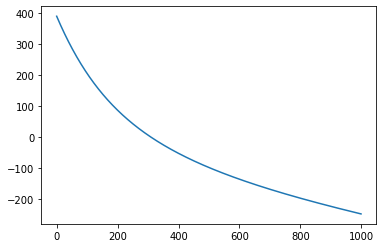

In [ ]:
import matplotlib.pyplot as plt

plt.plot(costs)



In [ ]:
xtest = x
ytest = Y
p= predict(para, xtest, ytest, layers)

In [ ]:
p

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])